In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
import seaborn as sns
import random
import pydotplus
import math
from IPython.display import Image
from sklearn import tree

In [36]:
data = pd.read_csv("bench.csv" ,encoding="latin-1")
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


          A         C         E         K         L         M         O
A  1.000000 -0.077369  0.022270  0.071350  0.058579  0.067277  0.224656
C -0.077369  1.000000 -0.038342 -0.005941 -0.001596 -0.009567 -0.006185
E  0.022270 -0.038342  1.000000  0.125241  0.081180  0.139487  0.326353
K  0.071350 -0.005941  0.125241  1.000000 -0.031297  0.082815  0.221688
L  0.058579 -0.001596  0.081180 -0.031297  1.000000  0.054575  0.147742
M  0.067277 -0.009567  0.139487  0.082815  0.054575  1.000000  0.223298
O  0.224656 -0.006185  0.326353  0.221688  0.147742  0.223298  1.000000


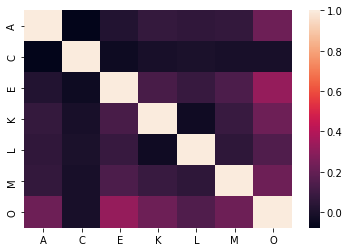

In [37]:
corr = data.corr()
sns.heatmap(corr)
print(corr)

In [38]:
data.dropna(inplace=True)
print(data.shape)

(31321, 15)


In [39]:
data = pd.get_dummies(data)
labels = np.array(data['O'])
data= data.drop('O', axis = 1)
data_list = list(data.columns)
data.shape

(31321, 107)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print ("Train_x Shape: ",x_train.shape)
print ("Train_y Shape: ", y_train.shape)
print ("Test_x Shape: ", x_test.shape)
print ("Test_y Shape: ", y_test.shape)

Train_x Shape:  (25056, 107)
Train_y Shape:  (25056,)
Test_x Shape:  (6265, 107)
Test_y Shape:  (6265,)


In [41]:
# Decision Tree
clsfr = DecisionTreeClassifier()
clsfr = clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy Score:", accuracy_score(y_test, pred))
print("Auc Score:", roc_auc_score(y_test, pred))
print("Auc Score Prob:", roc_auc_score(y_test, pred_prob))
print("Recall Score:", recall_score(y_test, pred))
print("Precission Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

feature_imp = pd.DataFrame(clsfr.feature_importances_, index=x_train.columns, columns=["importance"]).sort_values(
                            "importance", ascending=False)

print(feature_imp)

[[4183  577]
 [ 551  954]]
Accuracy Score: 0.819952114924182
Auc Score: 0.7563342778972053
Auc Score Prob: 0.7563342778972053
Recall Score: 0.6338870431893687
Precission Score: 0.6231221423905944
F1 Score: 0.6284584980237155
                               importance
F_ Married-civ-spouse            0.200971
C                                0.187145
E                                0.107410
A                                0.107119
K                                0.103100
...                                   ...
N_ Scotland                      0.000000
N_ Ecuador                       0.000000
N_ Thailand                      0.000000
N_ Hong                          0.000000
N_ Outlying-US(Guam-USVI-etc)    0.000000

[107 rows x 1 columns]


In [45]:
# Decision Tree
clsfr2 = DecisionTreeClassifier(criterion="entropy", max_depth=9)
clsfr2 = clsfr2.fit(x_train, y_train)

pred2 = clsfr2.predict(x_test)
pred_prob2 = clsfr2.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred2))
print("Accuracy Score:", accuracy_score(y_test, pred2))
print("Auc Score:", roc_auc_score(y_test, pred2))
print("Auc Score Prob:", roc_auc_score(y_test, pred_prob2))
print("Recall Score:", recall_score(y_test, pred2))
print("Precission Score:", precision_score(y_test, pred2))
print("F1 Score:", f1_score(y_test, pred2))

feature_imp = pd.DataFrame(clsfr2.feature_importances_, index=x_train.columns, columns=["importance"]).sort_values(
                            "importance", ascending=False)

print(feature_imp)

[[4478  282]
 [ 602  903]]
Accuracy Score: 0.8588986432561851
Auc Score: 0.7703781512605042
Auc Score Prob: 0.8983885647282169
Recall Score: 0.6
Precission Score: 0.7620253164556962
F1 Score: 0.6713754646840149
                       importance
F_ Married-civ-spouse    0.407731
E                        0.185235
K                        0.182123
A                        0.065783
L                        0.063546
...                           ...
G_ Machine-op-inspct     0.000000
B_ Never-worked          0.000000
G_ Craft-repair          0.000000
G_ Armed-Forces          0.000000
N_ Yugoslavia            0.000000

[107 rows x 1 columns]


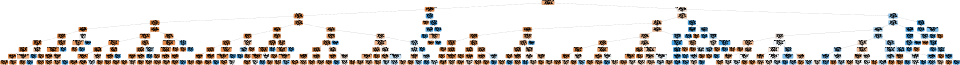

In [46]:
dot_dat = tree.export_graphviz(clsfr2, out_file=None, feature_names=data.columns, class_names=["0", "1"], filled=True,
                              rounded=True)

pydot_grp = pydotplus.graph_from_dot_data(dot_dat)
pydot_grp.write_png("tree.png")
pydot_grp.set_size("10, 10!")
Image(pydot_grp.create_png())

In [48]:
# Bagging
bag = BaggingClassifier(base_estimator=clsfr2, n_estimators=100, random_state=42)
bag = bag.fit(x_train, y_train)

pred3 = bag.predict(x_test)
pred_prob3 = bag.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred3))
print("Accuracy", accuracy_score(y_test, pred3))
print("Auc Score Prob", roc_auc_score(y_test, pred_prob3))
print("Recall", recall_score(y_test, pred3))
print("Precission", precision_score(y_test, pred3))
print("F1 Score", f1_score(y_test, pred3))

featureimp = np.mean([tree.feature_importances_ for tree in bag.estimators_], axis=0)

featureimpo = pd.DataFrame(featureimp, index=x_train.columns, columns=["importance"]).sort_values("importance",
                                                                                                 ascending=False)

print(featureimpo)


[[4535  225]
 [ 642  863]]
Accuracy 0.8616121308858739
Auc Score Prob 0.9133293084675731
Recall 0.573421926910299
Precission 0.7931985294117647
F1 Score 0.6656382568453528
                       importance
F_ Married-civ-spouse    0.392250
K                        0.182672
E                        0.176368
A                        0.069174
L                        0.061265
...                           ...
N_ Laos                  0.000000
N_ Haiti                 0.000000
N_ Hong                  0.000000
B_ Never-worked          0.000000
B_ Without-pay           0.000000

[107 rows x 1 columns]


In [50]:
# Random Forest
frst = RandomForestClassifier(n_estimators=100, max_features=4)
frst = frst.fit(x_train, y_train)

pred4 = frst.predict(x_test)
pred_prob4 = frst.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred4))
print("Accuracy:", accuracy_score(y_test, pred4))
print ("AUC Score:", roc_auc_score(y_test, pred4))
print ("AUC Score prob:", roc_auc_score(y_test, pred_prob4))
print ("Precision:", precision_score(y_test, pred4))
print ("Recall:", recall_score(y_test, pred4))
print ("F1 Score:", f1_score(y_test, pred4))

feature_importances = pd.DataFrame(frst.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


[[4427  333]
 [ 625  880]]
Accuracy: 0.8470869912210695
AUC Score: 0.7573798123900723
AUC Score prob: 0.8943770066166001
Precision: 0.7254740313272877
Recall: 0.584717607973422
F1 Score: 0.6475349521707138
                                 importance
C                              1.679253e-01
A                              1.563202e-01
M                              9.181854e-02
K                              7.642381e-02
F_ Married-civ-spouse          6.303041e-02
...                                     ...
G_ Armed-Forces                6.274075e-05
N_ Laos                        5.509713e-05
N_ Outlying-US(Guam-USVI-etc)  4.737133e-05
N_ Honduras                    3.371500e-05
B_ Never-worked                4.696468e-07

[107 rows x 1 columns]


In [51]:
# Adaptive Boosting
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc = abc.fit(x_train, y_train)

pred5 = abc.predict(x_test)
pred_prob5 = abc.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred5))
print("Accuracy:", accuracy_score(y_test, pred5))
print ("AUC Score:", roc_auc_score(y_test, pred5))
print ("AUC Score prob:", roc_auc_score(y_test, pred_prob5))
print ("Precision:", precision_score(y_test, pred5))
print ("Recall:", recall_score(y_test, pred5))
print ("F1 Score:", f1_score(y_test, pred5))

feature_importances = pd.DataFrame(abc.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

[[4492  268]
 [ 569  936]]
Accuracy: 0.8664006384676776
AUC Score: 0.7828121946453
AUC Score prob: 0.9205573857449956
Precision: 0.7774086378737541
Recall: 0.6219269102990034
F1 Score: 0.6910299003322259


In [52]:
# Gradient Boosting
grd = GradientBoostingClassifier(n_estimators=100, random_state=42)
grd = grd.fit(x_train, y_train)

pred6 = grd.predict(x_test)
pred_prob6 = grd.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred6))
print("Accuracy:", accuracy_score(y_test, pred6))
print ("AUC Score:", roc_auc_score(y_test, pred6))
print ("AUC Score prob:", roc_auc_score(y_test, pred_prob6))
print ("Precision:", precision_score(y_test, pred6))
print ("Recall:", recall_score(y_test, pred6))
print ("F1 Score:", f1_score(y_test, pred6))

feature_importances = pd.DataFrame(grd.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

[[4529  231]
 [ 604  901]]
Accuracy: 0.8667198723064645
AUC Score: 0.7750708422904045
AUC Score prob: 0.9208584829280549
Precision: 0.7959363957597173
Recall: 0.598671096345515
F1 Score: 0.683352294273796
                       importance
F_ Married-civ-spouse    0.396344
E                        0.196710
K                        0.194042
L                        0.061476
A                        0.052466
...                           ...
N_ China                 0.000000
N_ Columbia              0.000000
N_ Cuba                  0.000000
N_ Dominican-Republic    0.000000
I_ Black                 0.000000

[107 rows x 1 columns]


In [61]:
pred7 = pred2 + pred3 + pred4 + pred5 + pred6 
print(pred2)
print(pred3)
print(pred4)
print(pred5)
print(pred6)
print(pred7)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [64]:
pred_my_ens = (pred7 > 1).astype(int)
print(pred_my_ens)
print(confusion_matrix(y_test, pred_my_ens))
print("Accuracy:", accuracy_score(y_test, pred_my_ens))
print ("AUC Score:", roc_auc_score(y_test, pred_my_ens))
print ("Precision:", precision_score(y_test, pred_my_ens))
print ("Recall:", recall_score(y_test, pred_my_ens))
print ("F1 Score:", f1_score(y_test, pred_my_ens))

[0 0 0 ... 0 0 0]
[[4460  300]
 [ 541  964]]
Accuracy: 0.8657621707901038
AUC Score: 0.7887531756888803
Precision: 0.7626582278481012
Recall: 0.640531561461794
F1 Score: 0.6962802455760202
